In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles ,make_moons,make_blobs
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
np.random.seed(7)

In [73]:
x,y = make_classification(n_samples=400,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,class_sep=2.0,random_state=7)

In [74]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3,random_state=7,stratify=y)

In [75]:
clf = Perceptron(max_iter=1000, eta0=0.1,random_state=7,tol=1e-5)
clf.fit(xtr,ytr)
pred = clf.predict(xte)
acc = accuracy_score(yte,pred)
print(f"accuracy={acc}")


accuracy=0.9833333333333333


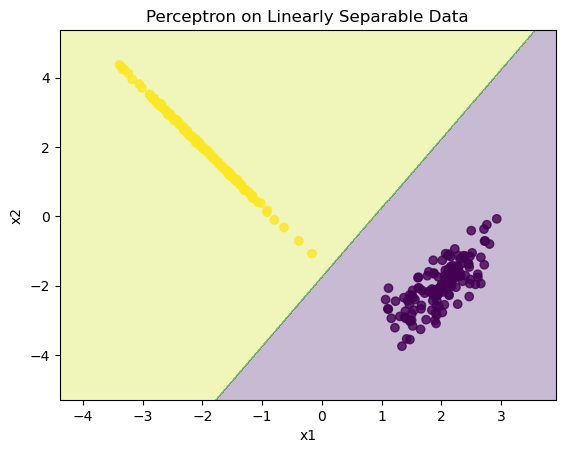

In [76]:
h = 0.02
xmin, xmax = x[:, 0].min() - 1, x[:, 0].max() + 1
ymin, ymax = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(xtr[:,0], xtr[:,1], c=ytr, alpha=0.8)
plt.title("Perceptron on Linearly Separable Data")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

In [77]:
xm, ym = make_moons(n_samples=400,noise=0.2,random_state=7)

In [78]:
xm_tr,xm_ts,ym_tr,ym_ts = train_test_split(xm,ym,test_size=0.3,random_state=7,stratify=ym)

In [79]:
p_moon = Perceptron(max_iter=2000, eta0=0.1, random_state=7, tol=1e-5)
p_moon.fit(xm_tr, ym_tr)

Perceptron(eta0=0.1, max_iter=2000, random_state=7, tol=1e-05)

In [80]:
predm = p_moon.predict(xm_ts)
accm = accuracy_score(ym_ts, predm)
print(f"Perceptron accuracy of Non-Lienar(moon) {accm}")

Perceptron accuracy of Non-Lienar(moon) 0.7416666666666667


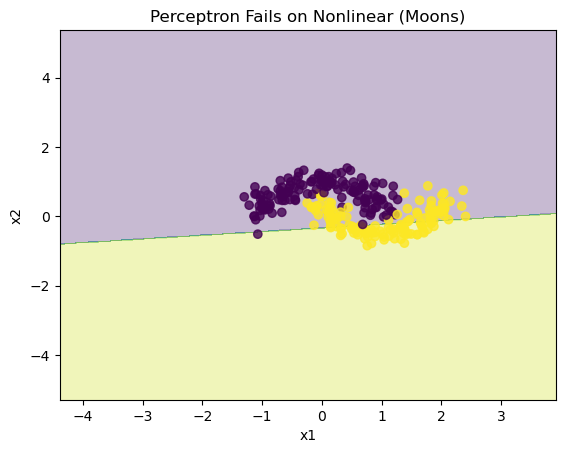

In [81]:
# Plot decision boundary
h = 0.02
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = p_moon.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(xm_tr[:,0], xm_tr[:,1], c=ym_tr, alpha=0.8)
plt.title("Perceptron Fails on Nonlinear (Moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()
